# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [30]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.corpus import reuters, stopwords
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline
load_dotenv('example.env')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/RES/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [31]:
import nltk
nltk.download('stopwords')
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/RES/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to /Users/RES/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /Users/RES/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
# Read your api key environment variable
news_api_key = os.getenv("news_api_key")

In [33]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=news_api_key)

In [86]:
# Fetch the Bitcoin news articles
#bitcoin_news = newsapi.get_everything(q="Bitcoin", language="en")
btc_articles = newsapi.get_everything(
    q="Bitcoin",# AND BTC", 
    language="en",
    page_size=100,
    #sort_by='relevancy'
)
bitcoin_news["totalResults"]

12496

In [87]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(
    q="Ethereum",# AND ETH", 
    language="en",
    page_size=100,
    #sort_by='relevancy'
)
ethereum_news["totalResults"]

5033

In [88]:
 def get_sentiment(articles):
    
    senti_out = []
    # Go through each article
    for article in articles:
        #print(article['content'])
        try:
            text      = article["content"]            
            sentiment = analyzer.polarity_scores(text)
            compound  = sentiment['compound']
            pos       = sentiment['pos']
            neg       = sentiment['neg']
            neu       = sentiment['neu']

                        
            senti_out.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral":  neu,
                "Positive": pos,
                "text":     text
            })
        except AttributeError:
            pass
    
    
    return pd.DataFrame(senti_out)

In [89]:
btc_sentiment = get_sentiment(btc_articles['articles'])
btc_sentiment.head()

,Compound,Negative,Neutral,Positive,text
0,0.3818,0.00,0.929,0.071,Just weeks after Tesla started accepting Bitco...
1,0.2960,0.00,0.942,0.058,Shares of Square are up more than 6% today aft...
2,0.4939,0.05,0.816,0.134,Image: Tesla\r\n\n \n\n Tesla has stopped acce...
3,0.0000,0.00,1.000,0.000,Illustration by Alex Castro / The Verge\r\n\n ...
4,0.4754,0.00,0.925,0.075,"Last week, whenElon Musk tweeted that he had s..."


In [90]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment = get_sentiment(eth_articles['articles'])
eth_sentiment.head()

,Compound,Negative,Neutral,Positive,text
0,0.2263,0.000,0.940,0.060,"Vitalik Buterin, the creator of Ethereum, on W..."
1,-0.2144,0.111,0.835,0.054,Their investors call them disruptive innovator...
2,0.5499,0.000,0.894,0.106,Solana isn’t known yet outside of the crypto c...
3,0.0000,0.000,1.000,0.000,New York (CNN Business)Bitcoin prices continue...
4,0.4754,0.000,0.909,0.091,"The creators behind CryptoPunks, one of the mo..."


In [38]:
# Describe the Bitcoin Sentiment
btc_sentiment.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.156455,0.036900,0.896750,0.066350
std,0.455031,0.043827,0.087335,0.084439
min,-0.526700,0.000000,0.710000,0.000000
25%,-0.050575,0.000000,0.853000,0.000000
50%,0.000000,0.020500,0.890000,0.026500
75%,0.577875,0.060250,1.000000,0.129500
max,0.938100,0.147000,1.000000,0.290000


In [91]:
# Describe the Ethereum Sentiment
eth_sentiment.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.071246,0.032100,0.908320,0.049560
std,0.346695,0.059027,0.119778,0.055731
min,-0.918600,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.855000,0.000000
50%,0.000000,0.000000,0.927500,0.046000
75%,0.340000,0.062000,1.000000,0.078250
max,0.817600,0.289000,1.000000,0.210000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [66]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [67]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
print(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon= {'said', 'says', 'kilolters', ''}

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [118]:

# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""


# Remove the punctuation from text

    
# Create a tokenized list of the words  

    
# Lemmatize words into root words  

    
# Convert the words to lowercase

# Remove the stop words

    
    
sw = set(stopwords.words("english"))
regex = re.compile('[^a-zA-Z ]')
re_clean = regex.sub('', text)
words = word_tokenize(re_clean)
lemmatizer = WordNetLemmatizer()
lem = [lemmatizer.lemmatize(word) for word in words]
tokens = [word.lower() for word in lem if word.lower() not in sw]
return tokens

NameError: name 'text' is not defined

In [119]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    lower_words = [word.lower() for word in words]
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean_words = [regex.sub('', word) for word in lower_words]   
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    stopped_words=[word for word in re_clean_words if word not in sw.union(sw_addon)]
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in stopped_words]
    
    return tokens

In [120]:
import nltk
nltk.download('wordnet')

 # Create a new tokens column for bitcoin
btc_sentiment['tokens'] = [tokenizer(text) for text in btc_sentiment['text']]
btc_sentiment.tail()

[nltk_data] Downloading package wordnet to /Users/RES/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Compound,Negative,Neutral,Positive,text,tokens
95,0.0000,0.000,1.000,0.000,Representations of virtual currency Bitcoin ar...,"[representation, virtual, currency, bitcoin, s..."
96,0.1531,0.059,0.833,0.108,"Another day, another person claiming theyve cr...","[another, day, another, person, claiming, they..."
97,0.1779,0.000,0.954,0.046,(Kitco News) It is red across the board in the...,"[kitco, news, red, across, board, crypto, spac..."
98,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nSmall toy figurines are se...,"[reuters, staff, small, toy, figurine, seen, r..."
99,-0.2732,0.060,0.940,0.000,"By Reuters Staff\r\nHONG KONG, May 21 (Reuters...","[reuters, staff, hong, kong, may, reuters, chi..."


In [96]:
# Create a new tokens column for Ethereum
ethereum_df['Text'] = str(ethereum_df['Text'])

eth_tokens = []
for i in ethereum_df['Text']:
    tokenized_text = tokenizer(i)
    eth_tokens.append({'tokens':tokenized_text})

eth_tokens_df = pd.DataFrame(eth_tokens)
ethereum_df['tokens'] = eth_tokens_df
ethereum_df.head()

,Compound,Negative,Neutral,Positive,Text,tokens
0,0.4215,0.000,0.907,0.093,"0 Vitalik Buterin, the creator of Ethereum...","[vitalik, buterin, creator, ethereum, w, inves..."
1,-0.7814,0.215,0.785,0.000,"0 Vitalik Buterin, the creator of Ethereum...","[vitalik, buterin, creator, ethereum, w, inves..."
2,0.5499,0.000,0.917,0.083,"0 Vitalik Buterin, the creator of Ethereum...","[vitalik, buterin, creator, ethereum, w, inves..."
3,0.0000,0.000,1.000,0.000,"0 Vitalik Buterin, the creator of Ethereum...","[vitalik, buterin, creator, ethereum, w, inves..."
4,0.4754,0.000,0.925,0.075,"0 Vitalik Buterin, the creator of Ethereum...","[vitalik, buterin, creator, ethereum, w, inves..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [97]:
from collections import Counter
from nltk import ngrams

In [99]:
# Generate the Bitcoin N-grams where N=2
all_text = tokenizer(' '.join(btc_sentiment['text']))          

bigrams = ngrams(all_text, n=2)
dict(Counter(bigrams).most_common(30))

{('elon', 'musk'): 34,
 ('char', 'reuters'): 13,
 ('reuters', 'staff'): 12,
 ('currency', 'bitcoin'): 11,
 ('char', 'bitcoin'): 10,
 ('virtual', 'currency'): 10,
 ('representation', 'virtual'): 9,
 ('illustration', 'taken'): 9,
 ('seen', 'front'): 8,
 ('may', 'reuters'): 8,
 ('char', 'representation'): 7,
 ('bos', 'elon'): 7,
 ('accepting', 'bitcoin'): 6,
 ('ceo', 'elon'): 6,
 ('tesla', 'inc'): 6,
 ('front', 'stock'): 6,
 ('stock', 'graph'): 6,
 ('graph', 'illustration'): 6,
 ('digital', 'currency'): 6,
 ('bitcoin', 'seen'): 6,
 ('tesla', 'ceo'): 5,
 ('new', 'york'): 5,
 ('char', 'elon'): 5,
 ('purchase', 'vehicle'): 5,
 ('bitcoin', 'mining'): 5,
 ('fossil', 'fuel'): 4,
 ('char', 'tesla'): 4,
 ('bitcoin', 'price'): 4,
 ('crypto', 'currency'): 4,
 ('bitcoin', 'purchase'): 4}

In [100]:
# Generate the Ethereum N-grams where N=2
#corpus = ethereum_df["Text"]
#bigram_counter(corpus)

all_text = tokenizer(' '.join(eth_sentiment['text']))          

bigrams = ngrams(all_text, n=2)
dict(Counter(bigrams).most_common(30))

{('representation', 'virtual'): 13,
 ('virtual', 'currency'): 13,
 ('illustration', 'taken'): 13,
 ('seen', 'front'): 10,
 ('front', 'stock'): 10,
 ('stock', 'graph'): 10,
 ('graph', 'illustration'): 10,
 ('char', 'representation'): 10,
 ('char', 'bitcoin'): 9,
 ('bitcoin', 'ethereum'): 8,
 ('reuters', 'staff'): 8,
 ('currency', 'bitcoin'): 8,
 ('char', 'reuters'): 7,
 ('currency', 'ethereum'): 7,
 ('ethereum', 'seen'): 7,
 ('taken', 'february'): 7,
 ('february', 'reutersdado'): 7,
 ('elon', 'musk'): 7,
 ('vitalik', 'buterin'): 6,
 ('cryptocurrency', 'ether'): 6,
 ('digital', 'currency'): 6,
 ('th', 'char'): 5,
 ('hit', 'record'): 5,
 ('may', 'reuters'): 5,
 ('high', 'monday'): 5,
 ('amp', 'p'): 5,
 ('new', 'york'): 4,
 ('ether', 'hit'): 4,
 ('record', 'high'): 4,
 ('last', 'week'): 4}

In [101]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [102]:
# Use token_count to get the top 10 words for Bitcoin
all_btc_words = tokenizer(' '.join(btc_sentiment['text']))          
btc_count = token_count(all_btc_words)
btc_count

[('char', 100),
 ('bitcoin', 83),
 ('musk', 40),
 ('elon', 34),
 ('tesla', 30),
 ('cryptocurrency', 27),
 ('reuters', 26),
 ('currency', 22),
 ('may', 20),
 ('company', 17)]

In [104]:
# Use token_count to get the top 10 words for Ethereum
all_eth_words = tokenizer(' '.join(eth_sentiment['text']))          
eth_count = token_count(all_eth_words)
eth_count

[('char', 98),
 ('bitcoin', 47),
 ('ethereum', 40),
 ('cryptocurrency', 28),
 ('currency', 24),
 ('digital', 18),
 ('crypto', 17),
 ('reuters', 16),
 ('new', 15),
 ('ether', 15)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

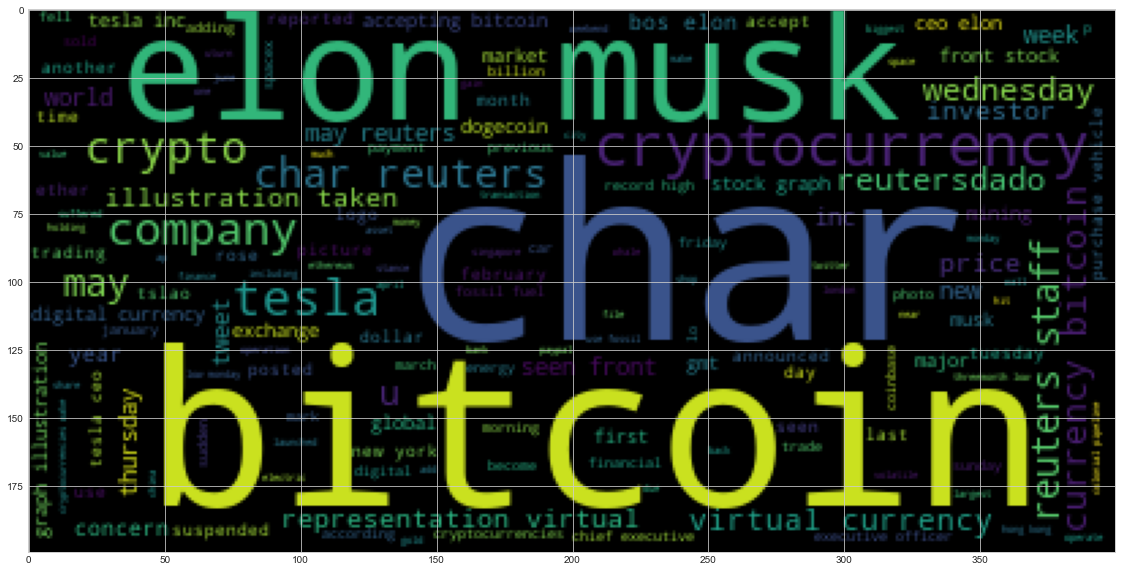

In [105]:
# Generate the Bitcoin word cloud
big_string = ' '.join(all_btc_words)
wc = WordCloud().generate(big_string)
plt.imshow(wc)

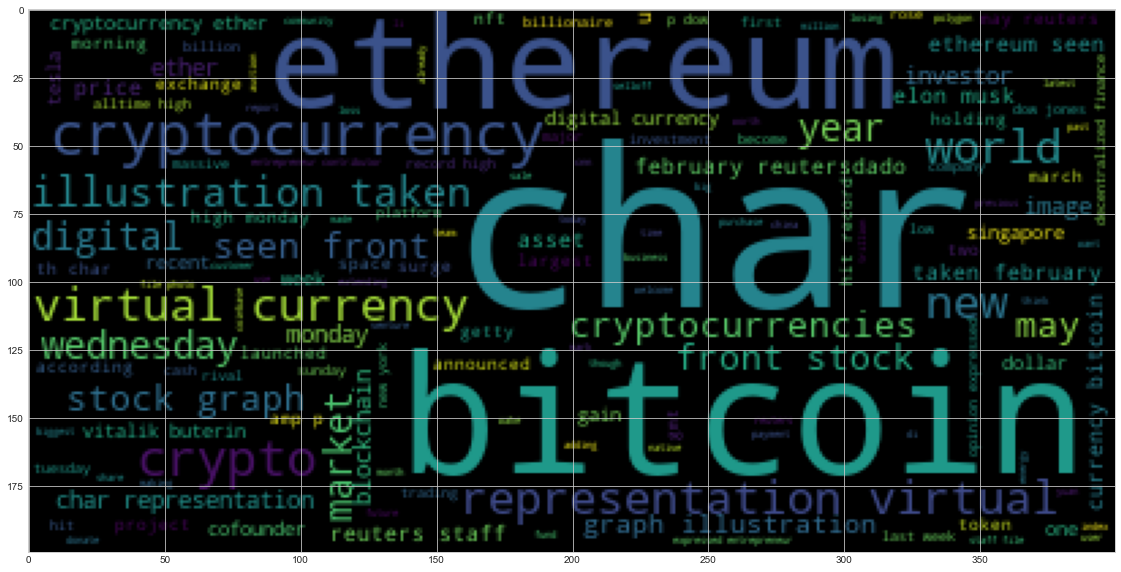

In [106]:
# Generate the Ethereum word cloud
big_string = ' '.join(all_eth_words)
wc = WordCloud().generate(big_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [107]:
import spacy
from spacy import displacy

In [108]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.7 MB 628 kB/s eta 0:00:01
You should consider upgrading via the '/Users/RES/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [47]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

### Bitcoin NER

In [85]:
# Concatenate all of the Bitcoin text together
articles = bitcoin_df["Text"].str.cat()
articles

'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars]Image: Tesla\r\n\n \n\n Tesla has stopped accepting bitcoin as payment for its cars out of concern that it will contribute to greater consumption of fossil fuels, according to a statement CEO Elon Musk tw… [+853 chars]Illustration by Alex Castro / The Verge\r\n\n \n\n Cryptocurrency exchange Coinbase is experiencing a “partial” outage this morning for its entire site and application. Additionally, both Coinbase and Bin… [+1307 chars]Last week, whenElon Musk tweeted that he had spoken with the team of Doge developers about how to make the coin more efficient, the imp

In [109]:
# Run the NER processor on all of the text
doc = nlp(articles)

# Add a title to the document
doc.user_data['title'] = 'Bitcoin NER'

In [110]:
# Render the visualization
displacy.render(doc, style='ent')

In [113]:
# List all Entities
#for ent in doc.ents:
# print (ent, ent.label_)
doc.ents[:20]

(Just weeks,
 Tesla,
 Bitcoin,
 Elon Musk,
 Square,
 more than 6%,
 today,
 American,
 $5.06 billion,
 2021,
 3.36,
 Tesla,
 Elon Musk,
 Alex Castro,
 The Verge
 
  
 
  Cryptocurrency,
 Coinbase,
 this morning,
 Coinbase,
 Bin,
 +1307 chars]Last week)

---

### Ethereum NER

In [114]:
# Concatenate all of the Ethereum text together
all_eth_text = [row for row in eth_sentiment['text']]
all_eth_text = ' '.join(all_eth_text)
all_eth_text[:2000]

"Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.\r\nButerin transferred 500 ETH and … [+1667 chars] Their investors call them disruptive innovators. Detractors like North Carolina Attorney General Josh Stein call them dirty scammers. But Leda Health co-founders Madison Campbell and Liesel Vaidya th… [+8679 chars] Solana isn’t known yet outside of the crypto community. But insiders think the blockchain platform is interesting for a wide variety of reasons, beginning with its amiable founder, Anatoly Yakovenko,… [+7156 chars] New York (CNN Business)Bitcoin prices continued their rebound Saturday, rising about 6% to nearly $58,000. But the world's largest cryptocurrency has been overshadowed lately by its younger sibling, … [+866 chars] The creators behind CryptoPunks, one of the most popular NFT projects on the web, just revealed their latest project called Meebits. The p

In [115]:
# Run the NER processor on all of the text
doc = nlp(articles)

# Add a title to the document
doc.user_data['title'] = 'Ethereum NER'

In [116]:
# Render the visualization
displacy.render(doc, style='ent')

In [117]:
# List all Entities
doc.ents[:20]

(Just weeks,
 Tesla,
 Bitcoin,
 Elon Musk,
 Square,
 more than 6%,
 today,
 American,
 $5.06 billion,
 2021,
 3.36,
 Tesla,
 Elon Musk,
 Alex Castro,
 The Verge
 
  
 
  Cryptocurrency,
 Coinbase,
 this morning,
 Coinbase,
 Bin,
 +1307 chars]Last week)

---